# **MODEL HOUSES PRICE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [4]:
%cd /content/drive/MyDrive/Colab

/content/drive/MyDrive/Colab


In [3]:
df=pd.read_csv('data_clean.csv')

# **Model Linear Regression**

In [9]:
X = df.loc[:, ['Diện tích đất', 'Số phòng ngủ', 'Số phòng vệ sinh', 'Chiều ngang','Chiều dọc','Kinh độ','Vĩ độ','Loại hình nhà ở','Mật độ dân số']]
y = df.loc[:, ['Giá']]
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)

In [11]:
regr = LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('RMSE: %.2f'% mean_squared_error(y_test, y_pred, squared=False))
print('R2_score: %.4f'% r2_score(y_test, y_pred))

RMSE: 4476.72
R2_score: 0.4153


# **Model KNN Regression**

In [12]:
n_neighbors=20
for n in range(1,n_neighbors):
    print(n)
    for i, weights in enumerate(['uniform', 'distance']):
        knn = KNeighborsRegressor(n_neighbors=n, weights=weights, p=1)
        y_ = knn.fit(X_train, y_train).predict(X_test)
        print('Mean squared error: %.2f'% mean_squared_error(y_test, y_))
        print('R2_score: %.4f'%r2_score(y_test, y_))
    print('\n')

1
Mean squared error: 14674270.29
R2_score: 0.5718
Mean squared error: 14674270.29
R2_score: 0.5718


2
Mean squared error: 12959114.48
R2_score: 0.6219
Mean squared error: 12233951.89
R2_score: 0.6430


3
Mean squared error: 12738705.58
R2_score: 0.6283
Mean squared error: 11538365.69
R2_score: 0.6633


4
Mean squared error: 12596757.43
R2_score: 0.6325
Mean squared error: 11138088.14
R2_score: 0.6750


5
Mean squared error: 12688858.12
R2_score: 0.6298
Mean squared error: 11019064.49
R2_score: 0.6785


6
Mean squared error: 12574384.57
R2_score: 0.6331
Mean squared error: 10827064.85
R2_score: 0.6841


7
Mean squared error: 12527538.36
R2_score: 0.6345
Mean squared error: 10754162.53
R2_score: 0.6862


8
Mean squared error: 12621463.50
R2_score: 0.6317
Mean squared error: 10714208.92
R2_score: 0.6874


9
Mean squared error: 12579428.42
R2_score: 0.6330


**Biểu diễn r2_score theo k của KNN để tìm k tối ưu nhất cho model**

Text(0, 0.5, 'Testing r2_score')

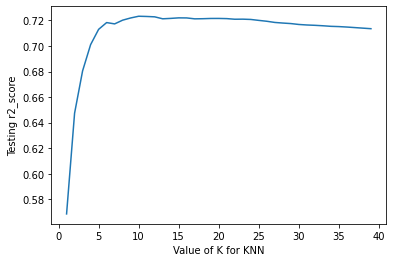

In [8]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# try K=1 through K=40 and record testing accuracy
k_range = range(1, 40)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 40
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance', p=1)
    y_=knn.fit(X_train, y_train).predict(X_test)
    scores.append(metrics.r2_score(y_test, y_))
# plot the relationship between K and testing r2_score
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing r2_score')

Nhìn biểu đồ ta nhận thấy giá trị k=12 là giá trị tốt nhất có thể!

# **DỰ DOÁN 1 BẢN GHI BẰNG MỘT MÔ HÌNH TỐT NHẤT**

In [12]:
import math
knn = KNeighborsRegressor(n_neighbors=12, weights='distance', p=1)
x=[200,	2, 3,	10	,20,	106.64857	,10.80190	,1	,1196]
x=np.array(x).reshape(1,-1)
y_ = knn.fit(X_train, y_train).predict(x)
print('Giá dự đoán là (triệu): ')
print(y_)

Giá dự đoán là (triệu): 
[[5282.79129219]]


C:\Users\sangc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# **MODEL THỬ NGHIỆM THÊM**

In [19]:
X = df.drop('Giá',axis =1).values
y = df['Giá'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [20]:
y

array([25000.  ,   960.  ,  3800.16, ...,  6149.7 , 49999.95,  2400.16])

In [21]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, df.drop('Giá',axis =1).columns, columns=['Coefficient']) 
coeff_df

7381.282451618661
[ 4.66728098e+01  5.68417790e+02  4.52094583e+02  2.75290534e+01
 -1.18291507e+01 -1.17995514e+02  2.93280543e+01  9.05341988e+02
  1.39935944e-01]


,Coefficient
Diện tích đất,46.672810
Số phòng ngủ,568.417790
Số phòng vệ sinh,452.094583
Chiều ngang,27.529053
Chiều dọc,-11.829151
Kinh độ,-117.995514
Vĩ độ,29.328054
Loại hình nhà ở,905.341988
Mật độ dân số,0.139936


In [22]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 2535.89766375386
MSE: 18588215.797681022
RMSE: 4311.405315866396
VarScore: 0.41838931096506604


C:\Users\sangc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

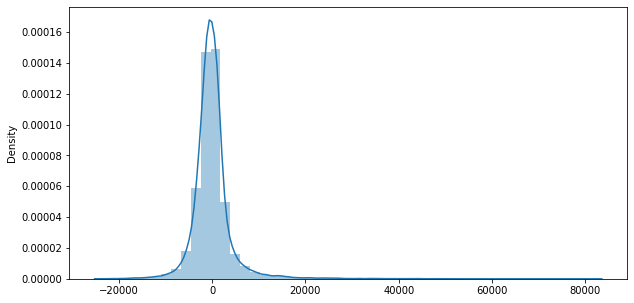

In [23]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [24]:
#Model 2: Keras Regressions (Neural Network Model)
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [25]:
# having 19 neuron is based on the number of available features
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [26]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=300)
model.summary()

Epoch 1/300
224/224 [==============================] - 1s 3ms/step - loss: 39211284.0000 - val_loss: 37981960.0000
Epoch 2/300
224/224 [==============================] - 1s 3ms/step - loss: 30573852.0000 - val_loss: 23763930.0000
Epoch 3/300
224/224 [==============================] - 1s 4ms/step - loss: 22703282.0000 - val_loss: 22266436.0000
Epoch 4/300
224/224 [==============================] - 1s 4ms/step - loss: 19969214.0000 - val_loss: 17761416.0000
Epoch 5/300
224/224 [==============================] - 1s 4ms/step - loss: 18335586.0000 - val_loss: 19085222.0000
Epoch 6/300
224/224 [==============================] - 1s 3ms/step - loss: 17146148.0000 - val_loss: 17244768.0000
Epoch 7/300
224/224 [==============================] - 1s 3ms/step - loss: 17203652.0000 - val_loss: 16929208.0000
Epoch 8/300
224/224 [==============================] - 1s 3ms/step - loss: 16722458.0000 - val_loss: 16960318.0000
Epoch 9/300
224/224 [==============================] - 1s 3ms/step - loss: 16872

<AxesSubplot:>

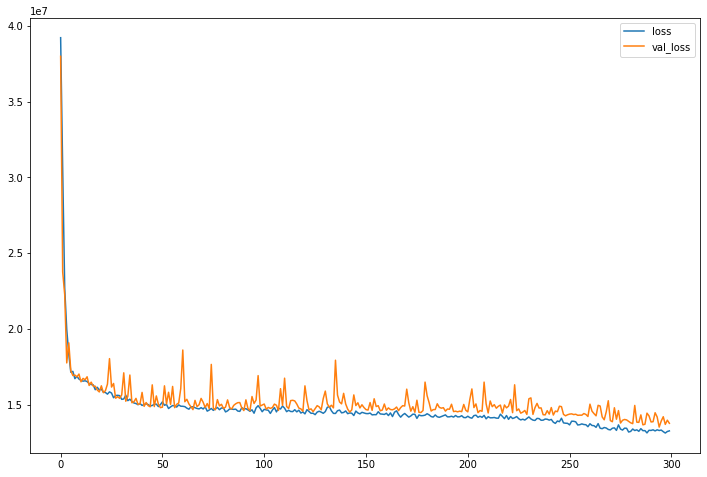

In [27]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 2109.8318635173896
MSE: 13779175.256934343
RMSE: 3712.0311497796383
VarScore: 0.5688872337593658


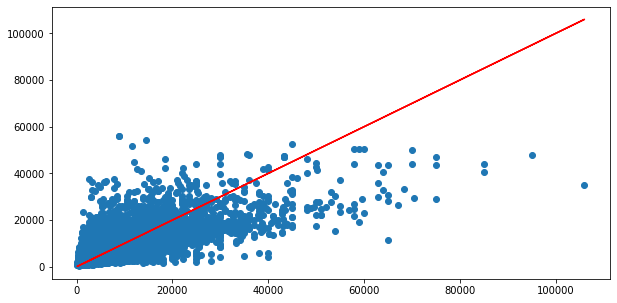

In [28]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')